### A new visualization notebook 
With the new epoch data and the working montage file   
NOTE: We placed the working montage file for the ANT Duke Waveguard 128 ch cap in the mne python source code  
(/Users/shateeshbhugwansing/anaconda/envs/mne/lib/python3.6/site-packages/mne/channels/data/montages) folder for easy access.

In [2]:
# %run ../preprocessing/StimCodes.ipynb
import mne
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline 

import matplotlib
matplotlib.rcParams.update({'font.size': 11})

In [3]:
montage = mne.channels.read_montage(kind="ANT_DukeWaveGuard_128_electrode_montages_updated_V4")


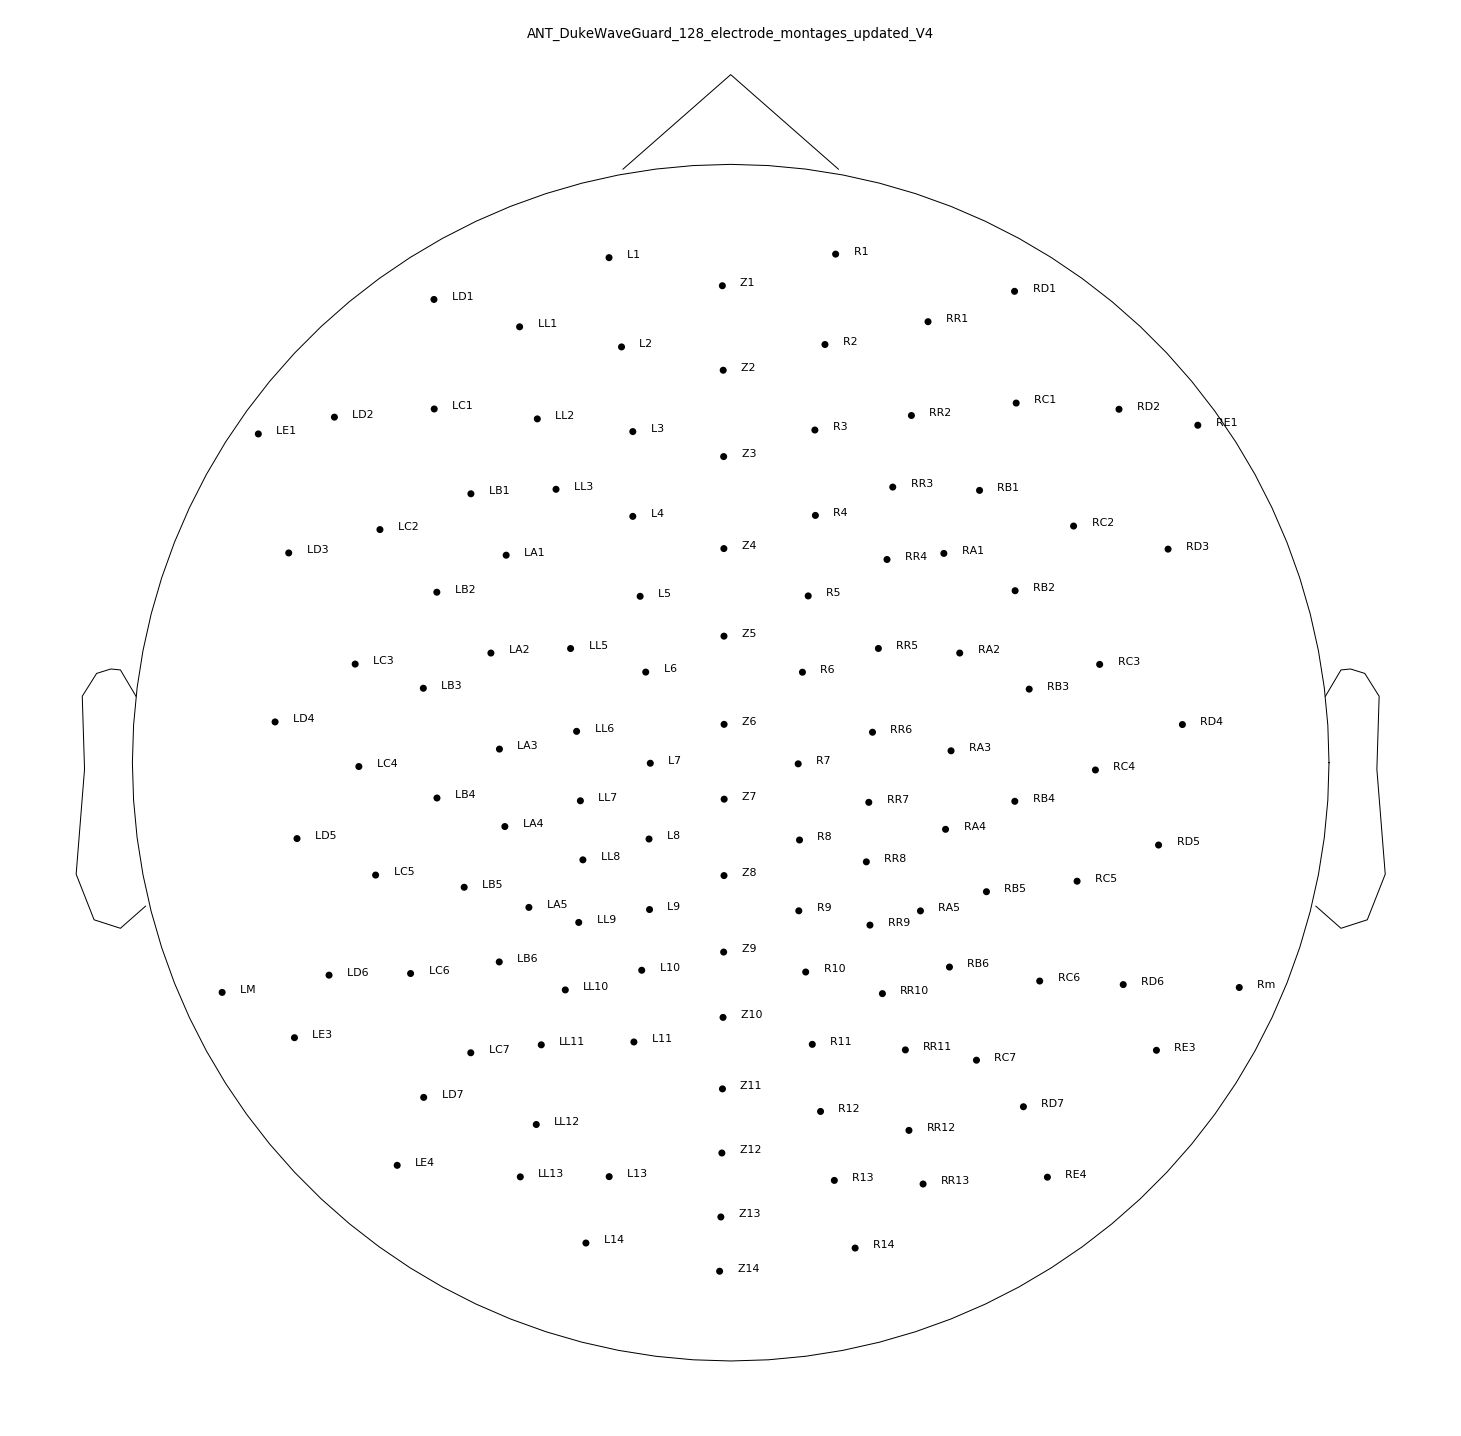

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
montage.plot(); 

In [5]:
# read in data 
# epoch_path = '/Volumes/SB/stim_code_epochs/20131216_1441_epo.fif'
epoch_path = '/Volumes/SB/stim_code_epochs/20140205_1114_epo.fif'
epoch = mne.read_epochs(epoch_path, preload=True)

Reading /Volumes/SB/stim_code_epochs/20140205_1114_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    1949.22 ms
        0 CTF compensation matrices available
951 matching events found
Applying baseline correction (mode: mean)
951 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [6]:
epoch.set_montage(montage)

The following EEG sensors did not have a position specified in the selected montage: ['Nasium', 'LL4', 'L12', 'VEOG']. Their position has been left untouched.


<ipython-input-6-2b9523d69e31>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['Nasium', 'LL4', 'L12', 'VEOG']. Their position has been left untouched.
  epoch.set_montage(montage)


<EpochsFIF  |   951 events (all good), 0 - 1.94922 sec, baseline [0, 0], ~468.3 MB, data loaded,
 'b-f1-pic': 40
 'b-f1-snd': 60
 'b-f1-spk': 80
 'b-f1-wrd': 39
 'b-f2-pic': 40
 'b-f2-snd': 60
 'b-f2-spk': 80
 'b-f2-wrd': 39
 'b-tg-pic': 40
 'b-tg-snd': 80
 'b-tg-spk': 79
 'b-tg-wrd': 20
 'f-f1-pic': 40
 'f-f1-snd': 20
 'f-f1-spk': 19
 'f-f1-wrd': 19
 'f-f2-pic': 40
 'f-f2-snd': 20
 'f-f2-spk': 19
 'f-f2-wrd': 19
 'f-tg-pic': 19
 'f-tg-snd': 59
 'f-tg-spk': 0
 'f-tg-wrd': 20>

#### Drop the bad channels: Lm, Rm, Nasium, VEOG

In [7]:
## Drop the bad channels 
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [8]:
epoch.drop_channels(['Lm', 'Rm', 'Nasium', 'VEOG'])

<EpochsFIF  |   951 events (all good), 0 - 1.94922 sec, baseline [0, 0], ~453.8 MB, data loaded,
 'b-f1-pic': 40
 'b-f1-snd': 60
 'b-f1-spk': 80
 'b-f1-wrd': 39
 'b-f2-pic': 40
 'b-f2-snd': 60
 'b-f2-spk': 80
 'b-f2-wrd': 39
 'b-tg-pic': 40
 'b-tg-snd': 80
 'b-tg-spk': 79
 'b-tg-wrd': 20
 'f-f1-pic': 40
 'f-f1-snd': 20
 'f-f1-spk': 19
 'f-f1-wrd': 19
 'f-f2-pic': 40
 'f-f2-snd': 20
 'f-f2-spk': 19
 'f-f2-wrd': 19
 'f-tg-pic': 19
 'f-tg-snd': 59
 'f-tg-spk': 0
 'f-tg-wrd': 20>

In [9]:
epoch.ch_names

['LE1',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'RE3',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 'LE4',
 'STI 014']

In [10]:
# remove missing channels 'LL4', 'L12'
epoch.drop_channels(['LL4', 'L12'])


<EpochsFIF  |   951 events (all good), 0 - 1.94922 sec, baseline [0, 0], ~446.5 MB, data loaded,
 'b-f1-pic': 40
 'b-f1-snd': 60
 'b-f1-spk': 80
 'b-f1-wrd': 39
 'b-f2-pic': 40
 'b-f2-snd': 60
 'b-f2-spk': 80
 'b-f2-wrd': 39
 'b-tg-pic': 40
 'b-tg-snd': 80
 'b-tg-spk': 79
 'b-tg-wrd': 20
 'f-f1-pic': 40
 'f-f1-snd': 20
 'f-f1-spk': 19
 'f-f1-wrd': 19
 'f-f2-pic': 40
 'f-f2-snd': 20
 'f-f2-spk': 19
 'f-f2-wrd': 19
 'f-tg-pic': 19
 'f-tg-snd': 59
 'f-tg-spk': 0
 'f-tg-wrd': 20>

In [11]:
len(epoch.ch_names)

123

## Classification experiment (to generate coefficients)
Audio vs. Visual  
data: stim_code_epochs/20131216_1441_epo.fif  
classifier: Logistic regression  


In [12]:
%run ../preprocessing/Artifact_Removal/Extract_Describer_Events.ipynb
%run ../preprocessing/Artifact_Removal/preprocecssing_helpers.ipynb
%run ../preprocessing/Artifact_Removal/Batch_ArtifactFilter_Epoch.ipynb
%run ../preprocessing/StimCodes.ipynb
%run ../Classification/ConcatEpochTrails.ipynb


ERROR:root:File `'preprocecssing_helpers.ipynb.py'` not found.
ERROR:root:File `'Batch_ArtifactFilter_Epoch.ipynb.py'` not found.
ERROR:root:File `'preprocecssing_helpers.ipynb.py'` not found.


In [13]:
audio_visual = convert_epoch_events_to_stim_combinations(epoch)

In [14]:
audio_visual

array([[  9559,      0,   1112],
       [  9843,      0,   1112],
       [ 10110,      0,   1112],
       ...,
       [423929,      0,    812],
       [424170,      0,    812],
       [424420,      0,    812]])

In [15]:
type(audio_visual[0])

numpy.ndarray

In [16]:
# replace the epoch.events with this audio_visual array
epoch.events.shape

(951, 3)

In [17]:
audio_visual.shape

(951, 3)

In [18]:
epoch.events = audio_visual


In [19]:
audio_visual[:,-1]

array([1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112, 1112,
       1112, 1112, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 1012,
       1012, 1012, 1012, 1012, 1012, 1012, 1012,  312,  312,  312,  312,
        312,  312,  312,  312,  312,  312,  312,  312,  312,  312,  312,
        312,  312,  312,  312,  312,  312,  312,  312,  312,  312,  312,
        312,  312,  312,  312,  312,  312,  312,  3

### epoch object has been updated with events that can be used for classification
epoch.events[:,-1] < 700 = audio  
epoch.events[:,-1] > 700 = visual

In [20]:
# create a labels array
# let 0 = audio, 1 = visual

labels = [0 if (x < 700) else 1 for x in audio_visual[:,-1]]

In [21]:
labels_np = np.array(labels)

In [22]:
# get imports used for classification algos 

from mne.decoding import Vectorizer, get_coef
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

In [23]:
# perform logistic regression, use cross validation

clf = make_pipeline(
                    Vectorizer(),
#                     MinMaxScaler(),
                    LogisticRegression(C=1))

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
# vectorizer = Vectorizer()
# data = vectorizer.fit_transform(filtered_epoch_lex._data)
# clf = LogisticRegression()


In [24]:
preds = np.empty(len(epoch._data))
coeff = []
data = epoch._data

In [25]:
print(labels_np.shape, data.shape)

(951,) (951, 123, 500)


In [26]:
type(labels[0])

int

In [27]:
for train, test in cv.split(data, labels_np):
    clf.fit(data[train], labels_np[train])
    coeff.append(get_coef(clf,'coef_'))
    preds[test] = clf.predict(data[test])
    
target_names = [ 'Audio', 'Visual']
report = classification_report(labels, preds, target_names=target_names)
print(report)

             precision    recall  f1-score   support

      Audio       0.69      0.68      0.69       654
     Visual       0.32      0.34      0.33       297

avg / total       0.58      0.57      0.57       951



In [28]:
from sklearn.model_selection import cross_val_score


In [29]:
scores = cross_val_score(clf, data, labels, cv=10, scoring='accuracy')

In [30]:
scores

array([0.59375   , 0.4375    , 0.54166667, 0.60416667, 0.51578947,
       0.53684211, 0.58947368, 0.5       , 0.57446809, 0.64893617])

# TO DO:
1. analyze the coefficients
    1. reshape them into 125x500 (currently in vectorized form (1x61500)
    2. for each coefficient matrix, find std, variance. 
    3. find the channels (rows) + times (columns) with the highest variance. 
    4. Compare them across all coeff matricies. Are the channels & time columns the same? 

In [231]:
def reshape_coeff_matrix(x, step = 500):
    """
    A method to reshape a 1D list of coefficients into the coefficient matrix: 
    example: (1, 615000) --> (123, 500)
    
    NOTE: YOU NEED TO IMPORT numpy as np to use this method
    
    Arguments: 
    - x = the current, 1D list of coefficients that needs to be reshaped. 
    - step = the desired length of one row in the new matrix (default = 500)
    
    Return:
    - A 2D np array with the desired shape
    """
    reshaped = []
    
    for i in range(0,len(x), step): 
        temp = []
        for j in range(i,i+step):
            temp.append(x[j])
    
        reshaped.append(temp)
    
    return np.array(reshaped)

    
    
    

### Ranking the channel + coefficients 
- To do this, I'm going to rank the channels based on the mean of their coefficients over the 500ms period. 
- Do this for each ofthe 10 coefficient matricies that are produced. 
- The hypothesis is that the same channels should appear at the top, meaning they are the same channels being used to do the classification every time (highest coefficients)

In [66]:
# convert all coefficient matricies into np arrays
for x in range(len(coeff_matrix)):
    coeff_matrix[x] = np.array(coeff_matrix[x])

print(type(coeff_matrix[0]))

<class 'numpy.ndarray'>


In [81]:
(coeff_matrix[1][122]).shape


(500,)

In [85]:
coeff_matrix_mean = []

for x in coeff_matrix:
    avg = []
    for i in range(len(x)):
        avg.append(np.mean(x[i]))
    coeff_matrix_mean.append(avg)


    

In [86]:
coeff_matrix_mean = np.array(coeff_matrix_mean)

In [89]:
len(coeff_matrix_mean)

10

In [90]:
# map the means to the channels

coeff_means_channels = []

for x in range(len(coeff_matrix_mean)):
    coeff_means_channels.append(dict(zip(channels, coeff_matrix_mean[x])))

    
    

In [91]:
coeff_means_channels[0]

{'LE1': 0.00010442537349236326,
 'LE3': 2.017495533231014e-05,
 'LD2': 5.628114497199313e-05,
 'LD5': 5.468618494690916e-05,
 'LC3': -4.433747120132114e-05,
 'LC6': -4.08667537309585e-06,
 'LB1': -5.826347868533977e-05,
 'LB4': -3.350194031928799e-05,
 'LA2': -3.927725285436093e-05,
 'LA5': -2.1456744254420303e-05,
 'LL1': -2.1298934010779765e-05,
 'LL7': -8.527260475232734e-06,
 'LL10': -1.2874066909623518e-05,
 'LL13': 3.3447508712420713e-06,
 'L3': -9.529785289386378e-06,
 'L6': 3.880122813077994e-06,
 'L9': -8.205748075637723e-06,
 'Z1': 8.129151231029845e-06,
 'Z4': 1.3717984882971465e-05,
 'Z7': 4.712499389360712e-06,
 'Z10': -1.3513774517869552e-05,
 'Z13': 3.1742671124979118e-06,
 'R3': 1.1496008555827284e-05,
 'R6': 1.404205163845194e-05,
 'R9': -1.976697298202507e-06,
 'R12': 1.0555233600378998e-07,
 'RR1': 1.1640666939035322e-05,
 'RR4': 2.708301122886577e-05,
 'RR7': 1.982684212749349e-05,
 'RR10': -1.1847869252330848e-05,
 'RR13': -5.589764359364789e-05,
 'RA2': 4.03807676

In [92]:
# convert all mean coefficients to abs value 

for d in coeff_means_channels:
    for k in d: 
        d[k] = abs(d[k])

In [93]:
coeff_means_channels[0]

{'LE1': 0.00010442537349236326,
 'LE3': 2.017495533231014e-05,
 'LD2': 5.628114497199313e-05,
 'LD5': 5.468618494690916e-05,
 'LC3': 4.433747120132114e-05,
 'LC6': 4.08667537309585e-06,
 'LB1': 5.826347868533977e-05,
 'LB4': 3.350194031928799e-05,
 'LA2': 3.927725285436093e-05,
 'LA5': 2.1456744254420303e-05,
 'LL1': 2.1298934010779765e-05,
 'LL7': 8.527260475232734e-06,
 'LL10': 1.2874066909623518e-05,
 'LL13': 3.3447508712420713e-06,
 'L3': 9.529785289386378e-06,
 'L6': 3.880122813077994e-06,
 'L9': 8.205748075637723e-06,
 'Z1': 8.129151231029845e-06,
 'Z4': 1.3717984882971465e-05,
 'Z7': 4.712499389360712e-06,
 'Z10': 1.3513774517869552e-05,
 'Z13': 3.1742671124979118e-06,
 'R3': 1.1496008555827284e-05,
 'R6': 1.404205163845194e-05,
 'R9': 1.976697298202507e-06,
 'R12': 1.0555233600378998e-07,
 'RR1': 1.1640666939035322e-05,
 'RR4': 2.708301122886577e-05,
 'RR7': 1.982684212749349e-05,
 'RR10': 1.1847869252330848e-05,
 'RR13': 5.589764359364789e-05,
 'RA2': 4.038076763386191e-05,
 '

In [96]:
# sort each dictionary in coeff_means_channels in order to rank them. should expect to see the same channels at the top
# for each dict


# this is a test
d = coeff_means_channels[0]
d_sorted = sorted(d, key=d.get, reverse=True)

In [95]:
d_sorted

['STI 014',
 'RC2',
 'LE1',
 'LC1',
 'LB2',
 'RB2',
 'LB1',
 'LD3',
 'LD2',
 'RR13',
 'LB3',
 'LD5',
 'LD4',
 'RC3',
 'RC4',
 'RA1',
 'LC3',
 'RE3',
 'LA1',
 'RA2',
 'RB3',
 'LA2',
 'RB1',
 'RR12',
 'LB4',
 'LC2',
 'LD1',
 'RC6',
 'RC7',
 'LA3',
 'LA4',
 'RE1',
 'RR6',
 'RD7',
 'LL3',
 'RR4',
 'LL2',
 'RD6',
 'RR3',
 'LC5',
 'RA3',
 'LA5',
 'LL1',
 'RR2',
 'LE3',
 'LC4',
 'RR7',
 'RR5',
 'R10',
 'LL5',
 'R6',
 'R11',
 'Z4',
 'Z10',
 'R4',
 'RC1',
 'RB6',
 'Z9',
 'LL10',
 'RA4',
 'R2',
 'LL11',
 'RR10',
 'RR1',
 'R3',
 'RD2',
 'R5',
 'L8',
 'RD5',
 'LL6',
 'R7',
 'L10',
 'L3',
 'L11',
 'L14',
 'LL7',
 'L9',
 'Z1',
 'R1',
 'L7',
 'Z11',
 'L2',
 'Z5',
 'Z6',
 'RR9',
 'LL8',
 'LD7',
 'Z3',
 'LE4',
 'LL9',
 'L1',
 'Z7',
 'RA5',
 'LC6',
 'RC5',
 'L6',
 'LD6',
 'LL12',
 'LC7',
 'RB4',
 'LL13',
 'L5',
 'Z13',
 'RR8',
 'RD3',
 'L4',
 'Z8',
 'R13',
 'L13',
 'RR11',
 'LB6',
 'RB5',
 'R9',
 'RE4',
 'RD1',
 'R8',
 'R14',
 'Z12',
 'LB5',
 'Z2',
 'Z14',
 'R12',
 'RD4']

In [100]:
# apply the sort to all dictionaries that I have 

sorted_means_channels = []

for x in range(len(coeff_means_channels)):
    d = coeff_means_channels[x]
    sorted_means_channels.append(sorted(d, key=d.get, reverse=True))

In [102]:
sorted_means_channels[0]

['STI 014',
 'RC2',
 'LE1',
 'LC1',
 'LB2',
 'RB2',
 'LB1',
 'LD3',
 'LD2',
 'RR13',
 'LB3',
 'LD5',
 'LD4',
 'RC3',
 'RC4',
 'RA1',
 'LC3',
 'RE3',
 'LA1',
 'RA2',
 'RB3',
 'LA2',
 'RB1',
 'RR12',
 'LB4',
 'LC2',
 'LD1',
 'RC6',
 'RC7',
 'LA3',
 'LA4',
 'RE1',
 'RR6',
 'RD7',
 'LL3',
 'RR4',
 'LL2',
 'RD6',
 'RR3',
 'LC5',
 'RA3',
 'LA5',
 'LL1',
 'RR2',
 'LE3',
 'LC4',
 'RR7',
 'RR5',
 'R10',
 'LL5',
 'R6',
 'R11',
 'Z4',
 'Z10',
 'R4',
 'RC1',
 'RB6',
 'Z9',
 'LL10',
 'RA4',
 'R2',
 'LL11',
 'RR10',
 'RR1',
 'R3',
 'RD2',
 'R5',
 'L8',
 'RD5',
 'LL6',
 'R7',
 'L10',
 'L3',
 'L11',
 'L14',
 'LL7',
 'L9',
 'Z1',
 'R1',
 'L7',
 'Z11',
 'L2',
 'Z5',
 'Z6',
 'RR9',
 'LL8',
 'LD7',
 'Z3',
 'LE4',
 'LL9',
 'L1',
 'Z7',
 'RA5',
 'LC6',
 'RC5',
 'L6',
 'LD6',
 'LL12',
 'LC7',
 'RB4',
 'LL13',
 'L5',
 'Z13',
 'RR8',
 'RD3',
 'L4',
 'Z8',
 'R13',
 'L13',
 'RR11',
 'LB6',
 'RB5',
 'R9',
 'RE4',
 'RD1',
 'R8',
 'R14',
 'Z12',
 'LB5',
 'Z2',
 'Z14',
 'R12',
 'RD4']

In [103]:
sorted_means_channels[1]

['STI 014',
 'RC2',
 'LE1',
 'LC1',
 'LB2',
 'RB2',
 'LB1',
 'LD3',
 'LD2',
 'RR13',
 'LB3',
 'LD5',
 'LD4',
 'RC3',
 'RC4',
 'RA1',
 'LC3',
 'RE3',
 'LA1',
 'RA2',
 'RB3',
 'LA2',
 'RB1',
 'RR12',
 'LB4',
 'LC2',
 'LD1',
 'RC6',
 'RC7',
 'LA3',
 'LA4',
 'RE1',
 'RR6',
 'RD7',
 'LL3',
 'RR4',
 'LL2',
 'RD6',
 'RR3',
 'LC5',
 'RA3',
 'LA5',
 'LL1',
 'RR2',
 'LE3',
 'LC4',
 'RR7',
 'RR5',
 'R10',
 'LL5',
 'R6',
 'R11',
 'Z4',
 'Z10',
 'R4',
 'RC1',
 'RB6',
 'Z9',
 'LL10',
 'RA4',
 'R2',
 'LL11',
 'RR10',
 'RR1',
 'R3',
 'RD2',
 'R5',
 'L8',
 'RD5',
 'LL6',
 'R7',
 'L10',
 'L3',
 'L11',
 'L14',
 'LL7',
 'L9',
 'Z1',
 'R1',
 'L7',
 'Z11',
 'L2',
 'Z5',
 'Z6',
 'RR9',
 'LL8',
 'LD7',
 'Z3',
 'LE4',
 'LL9',
 'L1',
 'Z7',
 'RA5',
 'LC6',
 'RC5',
 'L6',
 'LD6',
 'LL12',
 'LC7',
 'RB4',
 'LL13',
 'L5',
 'Z13',
 'RR8',
 'RD3',
 'L4',
 'Z8',
 'R13',
 'L13',
 'RR11',
 'LB6',
 'RB5',
 'R9',
 'RE4',
 'RD1',
 'R8',
 'R14',
 'Z12',
 'LB5',
 'Z2',
 'Z14',
 'R12',
 'RD4']

In [104]:
sorted_means_channels[2]

['STI 014',
 'RC2',
 'LE1',
 'LC1',
 'LB2',
 'RB2',
 'LB1',
 'LD3',
 'LD2',
 'RR13',
 'LB3',
 'LD5',
 'LD4',
 'RC3',
 'RC4',
 'RA1',
 'LC3',
 'RE3',
 'LA1',
 'RA2',
 'RB3',
 'LA2',
 'RB1',
 'RR12',
 'LB4',
 'LC2',
 'LD1',
 'RC6',
 'RC7',
 'LA3',
 'LA4',
 'RE1',
 'RR6',
 'RD7',
 'LL3',
 'RR4',
 'LL2',
 'RD6',
 'RR3',
 'LC5',
 'RA3',
 'LA5',
 'LL1',
 'RR2',
 'LE3',
 'LC4',
 'RR7',
 'RR5',
 'R10',
 'LL5',
 'R6',
 'R11',
 'Z4',
 'Z10',
 'R4',
 'RC1',
 'RB6',
 'Z9',
 'LL10',
 'RA4',
 'R2',
 'LL11',
 'RR10',
 'RR1',
 'R3',
 'RD2',
 'R5',
 'L8',
 'RD5',
 'LL6',
 'R7',
 'L10',
 'L3',
 'L11',
 'L14',
 'LL7',
 'L9',
 'Z1',
 'R1',
 'L7',
 'Z11',
 'L2',
 'Z5',
 'Z6',
 'RR9',
 'LL8',
 'LD7',
 'Z3',
 'LE4',
 'LL9',
 'L1',
 'Z7',
 'RA5',
 'LC6',
 'RC5',
 'L6',
 'LD6',
 'LL12',
 'LC7',
 'RB4',
 'LL13',
 'L5',
 'Z13',
 'RR8',
 'RD3',
 'L4',
 'Z8',
 'R13',
 'L13',
 'RR11',
 'LB6',
 'RB5',
 'R9',
 'RE4',
 'RD1',
 'R8',
 'R14',
 'Z12',
 'LB5',
 'Z2',
 'Z14',
 'R12',
 'RD4']

In [106]:
coeff_means_channels[1]

{'LE1': 0.00010442537349236326,
 'LE3': 2.017495533231014e-05,
 'LD2': 5.628114497199313e-05,
 'LD5': 5.468618494690916e-05,
 'LC3': 4.433747120132114e-05,
 'LC6': 4.08667537309585e-06,
 'LB1': 5.826347868533977e-05,
 'LB4': 3.350194031928799e-05,
 'LA2': 3.927725285436093e-05,
 'LA5': 2.1456744254420303e-05,
 'LL1': 2.1298934010779765e-05,
 'LL7': 8.527260475232734e-06,
 'LL10': 1.2874066909623518e-05,
 'LL13': 3.3447508712420713e-06,
 'L3': 9.529785289386378e-06,
 'L6': 3.880122813077994e-06,
 'L9': 8.205748075637723e-06,
 'Z1': 8.129151231029845e-06,
 'Z4': 1.3717984882971465e-05,
 'Z7': 4.712499389360712e-06,
 'Z10': 1.3513774517869552e-05,
 'Z13': 3.1742671124979118e-06,
 'R3': 1.1496008555827284e-05,
 'R6': 1.404205163845194e-05,
 'R9': 1.976697298202507e-06,
 'R12': 1.0555233600378998e-07,
 'RR1': 1.1640666939035322e-05,
 'RR4': 2.708301122886577e-05,
 'RR7': 1.982684212749349e-05,
 'RR10': 1.1847869252330848e-05,
 'RR13': 5.589764359364789e-05,
 'RA2': 4.038076763386191e-05,
 '

In [108]:
coeff_means_channels[5]

{'LE1': 0.00010442537349236326,
 'LE3': 2.017495533231014e-05,
 'LD2': 5.628114497199313e-05,
 'LD5': 5.468618494690916e-05,
 'LC3': 4.433747120132114e-05,
 'LC6': 4.08667537309585e-06,
 'LB1': 5.826347868533977e-05,
 'LB4': 3.350194031928799e-05,
 'LA2': 3.927725285436093e-05,
 'LA5': 2.1456744254420303e-05,
 'LL1': 2.1298934010779765e-05,
 'LL7': 8.527260475232734e-06,
 'LL10': 1.2874066909623518e-05,
 'LL13': 3.3447508712420713e-06,
 'L3': 9.529785289386378e-06,
 'L6': 3.880122813077994e-06,
 'L9': 8.205748075637723e-06,
 'Z1': 8.129151231029845e-06,
 'Z4': 1.3717984882971465e-05,
 'Z7': 4.712499389360712e-06,
 'Z10': 1.3513774517869552e-05,
 'Z13': 3.1742671124979118e-06,
 'R3': 1.1496008555827284e-05,
 'R6': 1.404205163845194e-05,
 'R9': 1.976697298202507e-06,
 'R12': 1.0555233600378998e-07,
 'RR1': 1.1640666939035322e-05,
 'RR4': 2.708301122886577e-05,
 'RR7': 1.982684212749349e-05,
 'RR10': 1.1847869252330848e-05,
 'RR13': 5.589764359364789e-05,
 'RA2': 4.038076763386191e-05,
 '

## Error: The way I did the coefficient means is wrong
each mean coefficient list is the same, apparently. Is that correct? 

Update: in coeff_matrix (10x123x500), for each fold in cv, the coefficents (123x500) are exactly the same.  
There might be an error in how I reshaped the coefficients 

In [129]:
coeff_np = np.array(coeff)

In [130]:
coeff_np.shape

(10, 1, 61500)

In [135]:
coeff_np[0][0]

array([ 0.00000000e+00,  1.39599393e-04,  1.35372678e-04, ...,
        7.65844682e-02, -3.06795633e-01, -2.69173266e-02])

In [136]:
coeff_np[1][0]

array([ 0.00000000e+00, -1.46868680e-04, -1.79073460e-04, ...,
        7.33747116e-02, -2.26055190e-01, -4.07525388e-02])

In [142]:
coeff_matrix_np = np.array(coeff_matrix)

In [235]:
len(coeff[0][0])

61500

In [164]:
coeff_0 = coeff[0][0] # (1, 615000)

print(len(coeff_0))

61500


In [167]:
# reshape coeff[0][0] back into 123 x 500
# coeff[0][0] is currently (1x)
one_matrix = []

for i in range(0,len(coeff_0), 500): 
    temp = []
    for j in range(i,i+500):
        temp.append(coeff_0[j])
    one_matrix.append(temp)



In [171]:
one_matrix_np = np.array(one_matrix)

one_matrix_np.shape

(123, 500)

In [172]:
one_matrix_np[0]

array([ 0.00000000e+00,  1.39599393e-04,  1.35372678e-04, -2.51800469e-05,
        1.61310096e-04,  2.45667670e-04, -7.92776165e-06,  5.55925018e-05,
        3.02926155e-04,  7.39445628e-05, -1.29279709e-04,  1.65716827e-04,
        4.34035267e-04, -1.36626434e-04, -1.47386531e-04,  4.05183625e-04,
       -2.28740872e-04, -1.15297693e-04,  5.67022754e-04,  4.05836612e-04,
        1.13513142e-04, -2.65694557e-04,  9.09101135e-05,  3.41215181e-04,
        9.14468892e-05,  7.95712471e-05,  1.08154314e-05,  6.98795637e-05,
        3.76241657e-05,  2.36402458e-04,  3.26251410e-05,  6.19223193e-05,
        3.13951053e-04, -8.24564092e-06,  3.05663904e-04,  6.55866933e-05,
       -1.71320909e-05,  3.53908068e-04,  1.16967195e-04, -2.64131218e-05,
       -5.97355366e-05,  2.09288424e-04,  3.04659139e-04,  7.71438549e-05,
       -1.46006596e-05,  4.39141696e-05, -1.05310244e-04,  2.91014348e-04,
        2.73982641e-04, -2.59681917e-04,  7.18750655e-05,  5.16712672e-04,
        2.58827224e-04, -

In [173]:
# do the same for another fold

coeff_1 = coeff[1][0] # (1, 615000)

print(len(coeff_1))

61500


In [174]:
coeff_0

array([ 0.00000000e+00,  1.39599393e-04,  1.35372678e-04, ...,
        7.65844682e-02, -3.06795633e-01, -2.69173266e-02])

In [175]:
coeff_1

array([ 0.00000000e+00, -1.46868680e-04, -1.79073460e-04, ...,
        7.33747116e-02, -2.26055190e-01, -4.07525388e-02])

In [184]:
three_matrix = []

for a in range(0,len(coeff_1), 500): 
    temp2 = []
    for b in range(a,a+500):
        temp2.append(coeff_1[b])
    three_matrix.append(temp2)


In [185]:
three_matrix_np = np.array(three_matrix)

three_matrix_np.shape

(123, 500)

In [187]:
three_matrix_np[0]

array([ 0.00000000e+00, -1.46868680e-04, -1.79073460e-04,  2.49860075e-05,
        7.91551947e-05, -1.64115275e-05, -7.71993363e-05,  1.99846471e-05,
        9.53979219e-05, -2.03676526e-05, -8.19484015e-05,  3.80229606e-05,
        1.22471262e-04, -6.29642028e-05, -1.72134017e-04,  2.27787401e-05,
        2.20202080e-05, -3.88110220e-05,  1.46364633e-04,  1.46155197e-04,
        7.08414456e-05, -2.20804095e-04, -1.05925400e-04,  2.70987550e-04,
        2.50801963e-05, -3.80201102e-05, -3.23408206e-05, -1.28402910e-05,
       -4.75981414e-05, -4.25341774e-05,  2.79643060e-05,  1.04218465e-05,
        2.32800365e-05, -7.38116646e-05,  3.08821478e-04,  9.62364705e-05,
       -2.73381640e-04,  1.14424901e-04,  8.93199983e-05, -1.66645725e-04,
       -1.19520923e-04,  1.98597033e-04,  7.89217708e-05, -1.46577463e-04,
       -5.88873714e-05, -9.85654230e-05, -2.48477227e-04,  4.91487760e-05,
        2.09966224e-04, -1.59196670e-04, -4.31170019e-05,  2.18490820e-04,
        1.07823219e-04,  

In [207]:
one_matrix_mean = []

for i in one_matrix:
    one_matrix_mean.append(np.mean(i))

In [213]:
one_matrix_mean

[0.00010442537349236326,
 2.017495533231014e-05,
 5.628114497199313e-05,
 5.468618494690916e-05,
 -4.433747120132114e-05,
 -4.08667537309585e-06,
 -5.826347868533977e-05,
 -3.350194031928799e-05,
 -3.927725285436093e-05,
 -2.1456744254420303e-05,
 -2.1298934010779765e-05,
 -8.527260475232734e-06,
 -1.2874066909623518e-05,
 3.3447508712420713e-06,
 -9.529785289386378e-06,
 3.880122813077994e-06,
 -8.205748075637723e-06,
 8.129151231029845e-06,
 1.3717984882971465e-05,
 4.712499389360712e-06,
 -1.3513774517869552e-05,
 3.1742671124979118e-06,
 1.1496008555827284e-05,
 1.404205163845194e-05,
 -1.976697298202507e-06,
 1.0555233600378998e-07,
 1.1640666939035322e-05,
 2.708301122886577e-05,
 1.982684212749349e-05,
 -1.1847869252330848e-05,
 -5.589764359364789e-05,
 4.038076763386191e-05,
 -4.663549165480044e-06,
 3.861984179263449e-05,
 3.3909249328368802e-06,
 4.9956757288103314e-05,
 -3.2169314221246634e-05,
 1.1076360739123444e-05,
 -1.064268647659982e-05,
 -2.9460116910877578e-05,
 -4.1

In [210]:
one_matrix_mean_np = np.array(one_matrix_mean)

In [214]:
three_matrix_mean = []

for i in three_matrix:
    three_matrix_mean.append(np.mean(i))

In [215]:
three_matrix_mean

[-2.37817741640405e-06,
 -3.090092676713616e-06,
 1.8890168281625743e-05,
 1.6718178254557028e-05,
 3.8752107441985956e-05,
 -1.1607548963894642e-05,
 2.065524263842461e-05,
 1.012496757117799e-05,
 4.906616164078545e-06,
 -1.7537324346261297e-05,
 2.571806217408511e-05,
 -1.435575183972238e-05,
 -1.672792464363939e-05,
 -1.9097267286034628e-05,
 8.352479255561734e-06,
 1.4946917188312311e-05,
 -1.431487186452171e-05,
 7.848785738165709e-06,
 1.4477739428279384e-05,
 4.329766145812676e-06,
 -2.819082230706789e-05,
 -2.1394324604705856e-05,
 1.0785753986624108e-05,
 1.5482321001524497e-05,
 -1.0133021581474073e-05,
 -2.238294548328561e-05,
 8.780000484380943e-06,
 2.3324935689482918e-05,
 1.5391868549784024e-05,
 -2.2418194001348865e-05,
 -7.047301803571261e-05,
 3.280968592851699e-05,
 -1.7559004508323144e-05,
 4.3498136052217163e-05,
 5.924698250636465e-06,
 5.294403652527077e-05,
 -4.1857098486347125e-05,
 1.7010846110123593e-05,
 -2.7667505869354362e-05,
 -3.1702593342191856e-05,
 -

In [216]:
len(coeff)

10

In [217]:
coeff[0]

array([[ 0.00000000e+00,  1.39599393e-04,  1.35372678e-04, ...,
         7.65844682e-02, -3.06795633e-01, -2.69173266e-02]])

In [218]:
coeff[1]

array([[ 0.00000000e+00, -1.46868680e-04, -1.79073460e-04, ...,
         7.33747116e-02, -2.26055190e-01, -4.07525388e-02]])

In [245]:
# test my method

coeff_2 = coeff[2][0]
four_matrix = reshape_coeff_matrix(coeff_2)

In [246]:
four_matrix.shape

(123, 500)

In [253]:
four_matrix[1]

array([ 0.00000000e+00,  7.15592868e-05,  2.48148571e-05, -3.47518798e-05,
        8.00643996e-05,  5.66437678e-05,  5.90052070e-05,  9.16574527e-05,
        3.44776442e-05, -4.83726417e-05, -3.79224948e-05,  5.30613044e-05,
        8.31716759e-05, -4.41694894e-05, -3.02744941e-05,  8.84564923e-05,
       -9.11485421e-05, -3.43319447e-05,  1.78915427e-04,  7.62587248e-05,
       -4.68617462e-05, -6.10589091e-05,  4.23476762e-05,  8.98886367e-05,
        5.49416092e-05,  2.28857607e-05, -1.88011734e-05,  8.26462188e-07,
        4.39469685e-05,  8.91244319e-05, -1.45865629e-05,  9.20376477e-06,
        1.08298807e-04,  3.23066219e-05,  9.99399610e-05,  5.82337573e-05,
       -1.13233219e-06,  8.09598480e-05,  7.52826230e-05,  1.95569776e-05,
        2.18943296e-05,  1.26082937e-04,  8.75875923e-05, -3.16561931e-05,
        2.42835852e-05,  1.44051228e-05, -1.18540449e-04,  9.79324979e-05,
        8.88659213e-05, -6.99517118e-05,  1.19892178e-04,  1.44309312e-04,
        4.60601243e-05, -

In [254]:
coeff_2[500:520]

array([ 0.00000000e+00,  7.15592868e-05,  2.48148571e-05, -3.47518798e-05,
        8.00643996e-05,  5.66437678e-05,  5.90052070e-05,  9.16574527e-05,
        3.44776442e-05, -4.83726417e-05, -3.79224948e-05,  5.30613044e-05,
        8.31716759e-05, -4.41694894e-05, -3.02744941e-05,  8.84564923e-05,
       -9.11485421e-05, -3.43319447e-05,  1.78915427e-04,  7.62587248e-05])